## Clase 3: Más de Pandas

En la clase anterior se vió el manejo básico de pandas, hoy repasaremos los conceptos e introduciremos mecanicas más avanzadas para el uso de esta herramienta. En esta clase usaremos los datos Futbol.csv, los cuales contienen los resultados de partidos de Fútbol de más de 38.000
 partidos internacionales desde 1872 hasta el 2018.

In [3]:
import pandas as pd
import numpy as np

In [4]:
futbol = pd.read_csv('Futbol.csv')

In [5]:
futbol.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


Cuando se trabaja con datos, hay operaciones que nos gusta ver apenas comienza la lectura de datos. Una de estas es ver cuantos datos faltantes tenemos.

Para esto usaremos parte de los conceptos de orientación a objetos. 
Lo que hay que notar es que varias operaciones sobre un objeto data frame, retornan otro objeto data frame, por lo cual varias operaciones pueden ser encadenadas. Por ejemplo, la función isnull() retorna un dataframe idéntico al original, pero en lugar de valores tiene True o False (1 o 0 para la máquina) a este resultado se le puede encadenar la operación de suma.

In [6]:
futbol.isnull().head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


Lo mismo lo podemos obtener en porcentajes usando algo de ingenio.

In [7]:
null_percent = futbol.isnull().mean() * 100

In [8]:
null_percent

date          0.0
home_team     0.0
away_team     0.0
home_score    0.0
away_score    0.0
tournament    0.0
city          0.0
country       0.0
dtype: float64

Cuando se encadena una operación a un data frame, este aplicará la operación para todos los elementos de la columna.

A pesar que no sea el caso, para ilustar se puede ver que aplicando lo anterior con un filtro sencillo, se pueden obtener los datos tal que las columnas no presenten cierto porcentaje de valores nulos.

In [9]:
futbol = futbol[null_percent[null_percent < 50].index]

In [10]:
null_percent[null_percent < 50].index

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country'],
      dtype='object')

En caso que quisieramos eliminar los possibles datos faltantes, la función dropna los elimina. Una vez los datos limpios quizas lo primero que nos gustaría obtener es un resumen de los datos. la función describe entrega esa información

In [11]:
futbol.describe()

,home_score,away_score
count,38759.000000,38759.000000
mean,1.728579,1.194871
std,1.722286,1.398132
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,22.000000


### Transformaciones Básicas

Para aplicar transformaciones, pandas tiene para ello la función assign, la cual permite aplicar cálculos a las variables. Su uso es el siguiente:

``` pd.assing(column_x = f(column_y, column_z, ...)) ```

donde ```f``` corresponde a una función.

**Ejemplo:** Los datos indican los resultados obtenidos. Genere un flag que sea 2 si es que el equipo local ganó, 1 si es empate y 0 si perdió

In [12]:
futbol = futbol.assign(home_winner = lambda x: (x.home_score > x.away_score) * 2 + (x.home_score == x.away_score))

In [13]:
futbol.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,home_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,1
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,1
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,2


**Ejercicio:** Genere una nueva columna "was_friendly" que tome el valor 1 si el partido fue amistoso (Friendly) y 0 en otro caso. Genere otra columna que sea la diferencia de goles.

In [14]:
futbol = (futbol.
 assign(was_friendly = lambda x: (x.tournament == 'Friendly') * 1).
 assign(dif_goal = lambda x: (x.home_score - x.away_score)))

In [15]:
futbol.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,home_winner,was_friendly,dif_goal
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,1,1,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,2,1,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,2,1,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,1,1,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,2,1,3


Otra familia de transformaciones importante es para el tipo de variables. Esto se logra con la función ```astype('tipo')```

**Ejemplo:** Transforme el home_score y el away_score a un int de 8 bits, vea como cambia el uso de memoria.

In [16]:
futbol.memory_usage()

Index              128
date            310072
home_team       310072
away_team       310072
home_score      310072
away_score      310072
tournament      310072
city            310072
country         310072
home_winner     310072
was_friendly    310072
dif_goal        310072
dtype: int64

Los tipos no se han definifo previamente, como vemos Python está ocupando la memoria de la forma más ineficiente posible, al definir un tipo global que puede englobar valores que puede tomar. Por ejemplo asigando números como enteros de 64 bits o decimales como floats de 64 bit. Em nuestro caso sabemos que algunos números no requieren tanto uso de memoria. Por ejemplo un entero de 8 bits aguanta valores desde -128 a 128

In [17]:
futbol.home_score = futbol.home_score.astype('int8')
futbol.away_score = futbol.away_score.astype('int8')
futbol.dif_goal = futbol.dif_goal.astype('int8')
futbol.home_winner = futbol.dif_goal.astype('int8')
futbol.was_friendly = futbol.was_friendly.astype('bool')
futbol.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,home_winner,was_friendly,dif_goal
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,0,True,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,2,True,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,1,True,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,0,True,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,3,True,3


In [18]:
futbol.memory_usage()

Index              128
date            310072
home_team       310072
away_team       310072
home_score       38759
away_score       38759
tournament      310072
city            310072
country         310072
home_winner      38759
was_friendly     38759
dif_goal         38759
dtype: int64

El uso de memoria se reduce en un factor de 8, esto es pues al leer datos, a las columnas se les asigna un tipo genérico, el cual ocupa los 64 bits de la máquina. Como cada byte usa 8 bits, el tamaño de cada dato es de 8 bytes, lo que hicimos fue asignar un entero de 8 bits para asi cada uno de esos datos sólo pese un byte en lugar de 8.

La moraleja es que se puede ahorrar bastante RAM asignando correctamente los tipos de variables.

### Más acerca del groupby

Si bien la clase pasada vimos el funcionamiento básico del groupby, ahora veremos una forma más general de uso. Consideremos la siguiente estructura:

```groupby([key_1, key2,..]).agg({'ag_1': ['function_1', 'function_2', ...], 'ag_2': ['function_1', 'function_2', ...]}) ```

Esta es la forma más general de agregación usando group_by. Se aplican las funciones de resumen a los campos indicados, de acuerdo a como se indica en el diccionario.

**Ejemplo:** Vamos a calcular el promedio y la mediana de los resultados del equipo local y el equipo de visita, todo esto por el torneo que se jugó. Aquí la llave es el torneo, las variables objetivos son los resultados y las funciones objetivo son la media y la mediana. Indique los campeonatos con más goles promedio de local


In [19]:
f = (futbol.groupby(['tournament']).
agg({'home_score': [np.mean, np.median], 'away_score': [np.mean, np.median]}).
reset_index().
sort_values([('home_score', 'mean')], ascending = False))

In [20]:
(futbol.groupby(['tournament']).
agg({'home_score': [np.mean, np.median], 'away_score': [np.mean, np.median]}).
head(5))

home_score        away_score       
                                      mean median       mean median
tournament                                                         
ABCS Tournament                   2.150000    2.0   1.550000    1.5
AFC Asian Cup                     1.539185    1.0   1.147335    1.0
AFC Asian Cup qualification       2.223629    2.0   1.123769    1.0
AFC Challenge Cup                 1.470000    1.0   1.190000    1.0
AFC Challenge Cup qualification   1.728261    1.0   1.315217    1.0

**Ejercicio:** Obtenga un resumen por pais jugando de local. Este resumen debe tener el promedio de goles de local, el número de partido jugados y la proporción de amistosos jugados.

In [21]:
(futbol.groupby(['home_team']).
agg({'home_score': [np.mean, len], 'was_friendly': [np.mean]}).
reset_index().
head(5))

home_team home_score      was_friendly
                        mean  len         mean
0     Afghanistan   1.289474   38     0.236842
1         Albania   1.123457  162     0.327160
2         Algeria   1.768953  277     0.480144
3  American Samoa   0.772727   22     0.000000
4         Andorra   0.319444   72     0.277778

Muchas veces nos interesa realizar operaciones dentro de un grupo, pero no necesariamente todas tienen que colapsar en un solo valor.
Un ejemplo de esto puede ser cualquier cálculo que retorne varios valores. Esto puede ser logrado con el apply, el cual aplica una función sin necesariamente agregar los valores. La estructura básica de uso es la siguiente

```groupby([key_1, key2,..]).apply(f(x)) ```

Esta estrucura es probablemente la más general, aquí sólo se indica una función, la cual recibe como argumento la data agrupada, el retorno puede ser cualquier cosa, pero la mejor práctica es que retorne otra data frame. En el caso de agg, estas son todas funciones reciben un array y retornan un valor. En este caso las funciones no necesariamente retornan un puro valor.

**Ejemplo:** Calcule el orden temporal del partido según pais jugado. Por ejemplo el primero de la tabla es en escocia, ese es el 1, el del registro 2 es el segundo de escocia, ese sería el 2 para el. 

In [22]:
(futbol.sort_values(['date']).
 assign(orden = 1).
groupby(['country']).
apply(lambda x: np.cumsum(x.orden)).
reset_index().
head(5))

,country,level_1,orden
0,Afghanistan,2314,1
1,Afghanistan,2315,2
2,Afghanistan,9697,3
3,Afghanistan,9698,4
4,Afghanistan,9699,5


Es el resultado, pero sería más útil con la fecha. Una opción es hacer un merge por el índice y la otra es aplicar dos o más funciones en el apply, una con el orden, otra que copie la misma fecha y otra que copie el pais.

In [23]:
(futbol.sort_values(['date']).
 assign(orden = 1).
groupby(['country']).
apply(lambda x: pd.DataFrame({'order': np.cumsum(x.orden), 'date': x.date, 'country': x.country})).
head())

,order,date,country
0,1,1872-11-30,Scotland
1,1,1873-03-08,England
2,2,1874-03-07,Scotland
3,2,1875-03-06,England
4,3,1876-03-04,Scotland


**Ejercicio:** Obtenga la serie del acumulado de diferencia de goles por cada pais en partidos de local. ¿Cómo va Chile?

In [24]:
diferencia_chile = (futbol.sort_values(['date']).
 assign(diferencia = lambda x: x.home_score - x.away_score).
groupby(['home_team']).
apply(lambda x: pd.DataFrame({'diferencia': np.cumsum(x.diferencia), 'date': x.date, 'country': x.home_team})).
sort_values(['country', 'date']).
query('country == "Chile"'))

In [25]:
diferencia_chile.head()

,diferencia,date,country
262,-3,1910-05-29,Chile
266,-6,1910-09-11,Chile
364,-8,1913-09-21,Chile
420,-12,1916-07-02,Chile
489,-14,1919-05-17,Chile


## Gráficos Sencillos 

La librería usual para graficar es la matplotlib, la cual produce unos gráficos bastante similares a los de R por default, si bien es la alternativa más flexible, pandas también trae incorporado un módulo para generar gráficos, este es el módulo .plot el cual trae una librería con los gráficos más comunes que solemos hacer. 

A pesar que ya se cargan las funciones necesarias de matplotlib, es necesario importar la librería para visualizar el gráfico.

### Histogramas

Los histogramas tienen la siguiente estructura básica:

``` df.hist(column, bins = 10, by = None, range = (x.min(), x.max()), color = None)```

**Ejemplo:** Genere un histograma rojo con los goles anotados por Chile de visita


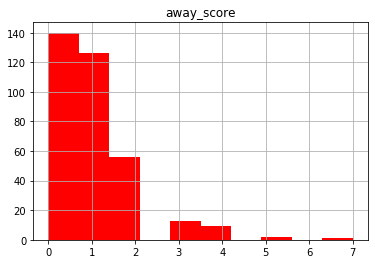

In [26]:
import matplotlib.pyplot as plt
futbol.query('away_team == "Chile"').hist(column = 'away_score', color = '#FF0000')
plt.show()

### Colores

El color se puede indicar de varias formas. La del ejemplo es mediante el código en hexadecimal, para leerlo:

- El # es gratuito, siempre va.
- Los dos primeros números indican la intensidad del rojo, siendo 00 nada de rojo y FF 255 de rojo. Los números se pueden obtener traduciendo el hexadecimal a decimal así
$$N_1 \cdot 16^1 + N_2 \cdot 16^0$$
Así se consideran los números y $A = 10$, $B = 11$, $C = 12$, $D = 13$, $E = 14$ y $F = 15$ en el ejemplo es 255 pues reemplazando las F

$$15 \cdot 16 + 15 \cdot 1 = 255$$

- Los dos segundos números son la intensidad de verde y los últimos dos la intensidad de azul.
- El `#000000` indica el color negro (ningún color) mientras `#FFFFFF` el blanco (todos los colores). Por último los numeros iguales darán un color en escala de gris
- Ahora ustedes ¿Cómo haría el morado?

Otra forma más sencilla de indicar el color es indicar directamente el RGB, indicando en una tupla cuanto de cada color, donde 1 es todo y 0 es nada.

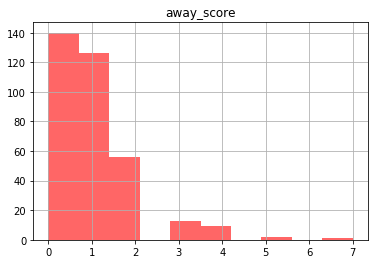

In [27]:
futbol.query('away_team == "Chile"').hist(column = 'away_score', color = (1, 0, 0, 0.6))
plt.show()

La forma más intuitiva (pero a mi gusto la menos recomendada) es utilizar el nombre de fantasía del color

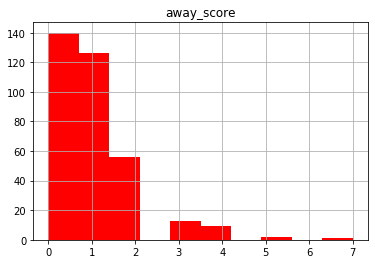

In [28]:
futbol.query('away_team == "Chile"').hist(column = 'away_score', color = 'red')
plt.show()

Para manipulación avanzada de colores se puede importar el módulo colors de matplotlib. 
Por ejemplo en caso que quisieran el RGB de algún color, la librería proporciona métodos para eso como para personalizar colores con sombras o efectos y diversas utilidades para colores. 

In [29]:
import matplotlib.colors as cl
cl.ColorConverter.to_rgb("red")

(1.0, 0.0, 0.0)

El histograma anterios es básico para obtener una vista rápida de los datos. Sin embargo si se requiere más detalle se sugiere crearlo más manualmente. Utilizando numpy y matplotlib se puede hacer el truco. Por ejemplo

In [30]:
Y, X = np.histogram(futbol.query('away_team == "Chile"')['away_score'])
print(Y)
print(X)

[140 126  56   0  13   9   0   2   0   1]
[0.  0.7 1.4 2.1 2.8 3.5 4.2 4.9 5.6 6.3 7. ]


Esto nos da números que son las coordenadas de la altura y comienzo de cada barra respectivamente. Estos valores pueden ser gráficados en barras. Aquí se especifica como:

`plt.bar(x, height, color, width, align, edgecolor, linewidth, tick_label, orientation)`

- `x` son las coordenada en el eje X donde se centra la barra
- `height` son las coordenades del eje Y, es decir las alturas de las barras
- `color` creo que el nombre es lo bastante explícito, sin embargo los colores se pueden asignar como un arreglo en caso que quisieran barras de distintos colores.
- `width` es el ancho de las barras.
- `align` indica si las barras se centran o se dejar comenzando a partir del valor X
- `edgecolor` es el colors del borde de la barra
- `linewidth` es el grosor del borde de las barras
- `tick_label` son las etiquetas del eje X en las barras
- `orientation` indica si se desean barras verticales u horizontales




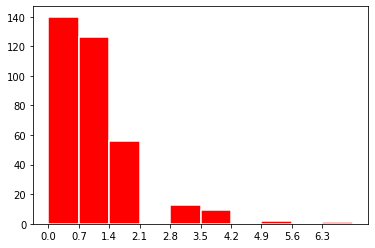

In [31]:
plt.bar(x = X[:-1],
        height = Y,
        color = "red",
        width = (X[1] - X[0]),
        align = 'edge',
        edgecolor = "#FFFFFF",
        linewidth = 1.5,
        tick_label = np.round(X[:-1], 1),
        orientation = "vertical")
plt.show()

Respecto a colores también se pueden usar paletas de colores ya predefinidas (también es posible definir las propias usando el módulo colors), estas generan rgb de acuerdo a un color inicial y final. Por ejemplo veamos la ocean 

In [32]:
cm = plt.cm.get_cmap('ocean')
print(cm(np.array(range(10)) / 10))

[[0.         0.5        0.         1.        ]
 [0.         0.35294118 0.09803922 1.        ]
 [0.         0.2        0.2        1.        ]
 [0.         0.05294118 0.29803922 1.        ]
 [0.         0.1        0.4        1.        ]
 [0.         0.25294118 0.50196078 1.        ]
 [0.         0.4        0.6        1.        ]
 [0.10588235 0.55294118 0.70196078 1.        ]
 [0.4        0.7        0.8        1.        ]
 [0.70588235 0.85294118 0.90196078 1.        ]]


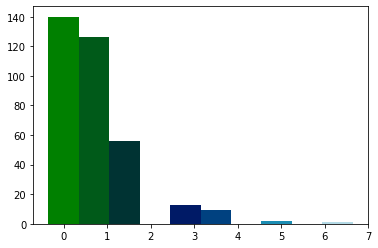

In [33]:
C = [cm(((x - X.min()) / (X.max() - X.min()))) for x in X]
plt.bar(X[:-1], Y, color = C, width = X[1] - X[0])
plt.show()

Si lo desean, también se puede agregar la grilla de fondo en el recuadro con la opción ``grid``.

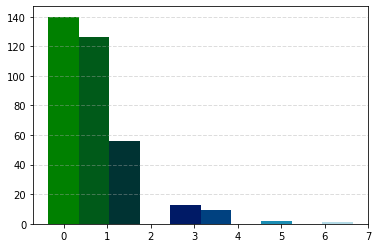

In [34]:
C = [cm(((x - X.min()) / (X.max() - X.min()))) for x in X]
plt.bar(X[:-1],
        Y,
        color = C,
        width = X[1] - X[0])
plt.grid(color = '#AAAAAA',
         linestyle = '--',
         axis = 'y',
         linewidth = 1,
        alpha = 0.4)
plt.show()

### Boxplot

Al igual que el histograma, se puede obtener uno rápido desde un data frame, cambian algunas pequeñas opciones

``` df.boxplot(column, by = None, color = None)```

- `column` es la data a usar
- `by` es el separador

**Ejemplo:** Genere un box-plot con los goles de local de Chile, Perú, Argentina y Brazil


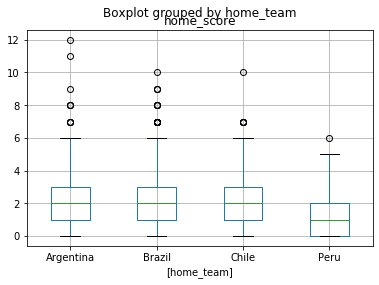

In [35]:
futbol.query('home_team in ["Chile", "Argentina", "Peru", "Brazil"]').boxplot(by = ['home_team'], column = 'home_score')
plt.show()

Al igual que con el histograma se puede hacer más general

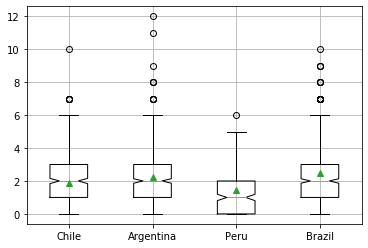

In [36]:
paises = ("Chile", "Argentina", "Peru", "Brazil")
dt = [futbol[futbol.home_team == x].home_score for x in paises] 
plt.boxplot(x = dt,
            labels = paises,
            notch = True,
           vert = True,
           showmeans = True)
plt.grid()
plt.show()

### Line plot

sigue la siguiente estructura

``` df.plot(x, y, by = None, color = None)```

**Ejemplo:** Obtenga el gráfico de línea de la evolución de la diferencia de goles en Chile.


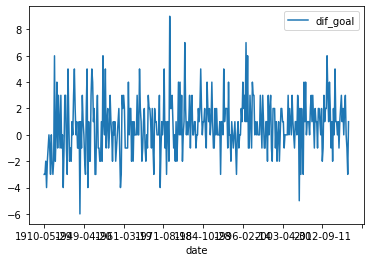

In [37]:
futbol.query("home_team == 'Chile'").plot(x = 'date', y = 'dif_goal')
plt.show()

### Scatter plot

Por último el scatter plot funciona parecido al de línea

``` df.plot(x, y, by = None, color = None, kind = 'scatter')```

**Ejemplo:** Genere un gráfico de dispersión de los goles favor vs los goles en contra de los partidos de chile de visita

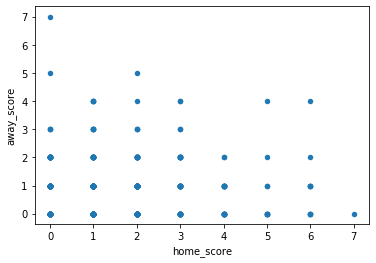

In [38]:
futbol.query('away_team == "Chile"').plot(x = 'home_score', y = 'away_score', kind = 'scatter')
plt.show()

### Más general

Como ya se observó, en los últimos gráficos basta cambiar el argumento "kind". En particular, están los siguientes tipos.

- ‘line’ : Line plot (default)
- ‘bar’ : Barras verticales
- ‘barh’ : Barras horizontales
- ‘hist’ : Histograma
- ‘box’ : Boxplot
- ‘kde’ : Gráfico de densidad por kernel
- ‘area’ : Gráfico de área
- ‘pie’ : Gráfico de torta
- ‘scatter’ : Scatter plot
- ‘hexbin’ : Gráfico de hexagonos.


## Gráficos no tan sencillos

Los gráficos de pandas son prácticos pues permiten encadenar el proceso de transformación de datos con el gráfico, sino embargo es necesario aplicar la libraría matplotlib con la finalidad de tener la mayor flexibilidad en los gráficos.

el uso básico es la función plot, la cual hace por defecto un gráfico de linea. Volvamos un momento al gráfico visto anteriormente, pero hecho de otra forma.

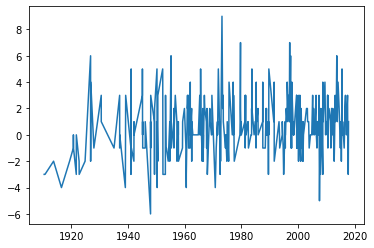

In [39]:
#Convertir a formato fecha. Ojo que esto es útil
futbol.date = pd.to_datetime(futbol.date)
plt.plot(futbol.query("home_team == 'Chile'").date, 
          futbol.query("home_team == 'Chile'").dif_goal)
plt.show()

Quizas lo primero que queremos cambiar es poner un título y nombre a los ejes, para esto antes de pedir que muestre el gráfico, se configuran los ejes, títulos, legendas y agregados al gráfico.

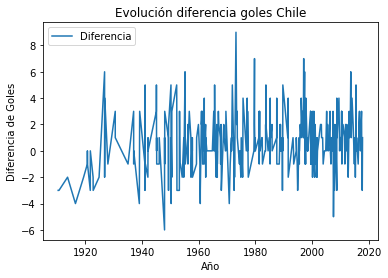

In [40]:
plt.plot(futbol.query("home_team == 'Chile'").date ,futbol.query("home_team == 'Chile'").dif_goal)
plt.title('Evolución diferencia goles Chile')
plt.xlabel('Año')
plt.ylabel('Diferencia de Goles')
plt.legend(('Diferencia',), loc = 'upper left')
plt.show()

Como se puede ver, cada añadido se lee y se une todo al aplicar el ```plt.show()```. 

**Ejercicio:** Cree una gráfico que muestre la evolución de la diferencia de goles de Chile y la de Argentina en un mismo gráfico. Agregue ejes, títulos y legendas. Asegurese que Chile esté en color rojo y Argentina en celeste.

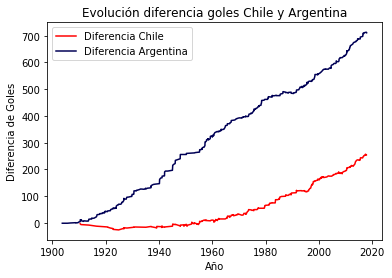

In [41]:
diferencia_argentina = (futbol.sort_values(['date']).
 assign(diferencia = lambda x: x.home_score - x.away_score).
groupby(['home_team']).
apply(lambda x: pd.DataFrame({'diferencia': np.cumsum(x.diferencia), 'date': x.date, 'country': x.home_team})).
sort_values(['country', 'date']).
query('country == "Argentina"'))

diferencia_chile = (futbol.sort_values(['date']).
 assign(diferencia = lambda x: x.home_score - x.away_score).
groupby(['home_team']).
apply(lambda x: pd.DataFrame({'diferencia': np.cumsum(x.diferencia), 'date': x.date, 'country': x.home_team})).
sort_values(['country', 'date']).
query('country == "Chile"'))

diferencia_argentina.date = pd.to_datetime(diferencia_argentina.date)
diferencia_chile.date = pd.to_datetime(diferencia_chile.date)

plt.plot(diferencia_chile.date ,diferencia_chile.diferencia, color = 'red')
plt.plot(diferencia_argentina.date ,diferencia_argentina.diferencia, color = '#000055')

plt.title('Evolución diferencia goles Chile y Argentina')
plt.xlabel('Año')
plt.ylabel('Diferencia de Goles')
plt.legend(('Diferencia Chile', 'Diferencia Argentina',), loc = 'upper left')
plt.show()



### Subplots

El objetivo de esto es mostrar varios gráficos en una misma ventana, sin necesidad de sobreponen un gráfico a otro. El comando básico es el ```figure```. Vamos a hacer un ejemplo sencillo, vamos a mostrar dos gráficos e una figura.

In [42]:
t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(np.pi * t)
s2 = np.cos(np.pi * t)
s3 = np.sqrt(t)

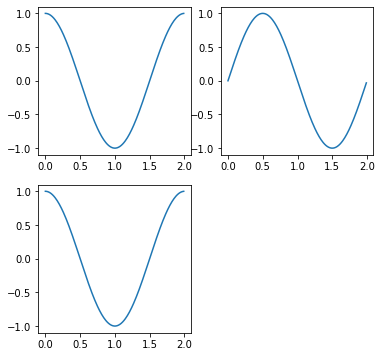

In [43]:
plt.figure(figsize = (6, 6))
plt.subplot(222)
plt.plot(t, s1)
plt.subplot(221)
plt.plot(t, s2)
plt.subplot(223)
plt.plot(t, s2)

plt.show()


**Explicación:**  Un subplot tiene tres números, el primero es el número de filas, el segundo el de columnas y el tercero el orden en que se muestran. Todos los gráficos son independientes los dos primeros números determinaran el tamaño, mientras que el tercero la posición en la matriz.
Si observan el primer gráfico es el del coseno a pesar que fue el segundo en ejecutarse.

**Ejercicio:** Genere una vista que muestre el gráfico del seno al lado derecho del coseno, y abajo de los dos que este el de raiz de t.

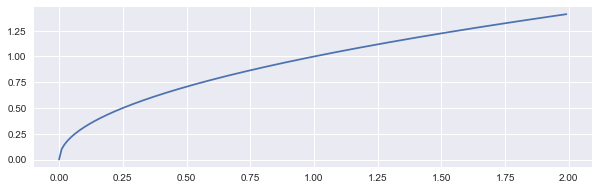

In [53]:
plt.figure(figsize = (10,10))
plt.subplot(332)
plt.plot(t, s2)
plt.subplot(331)
plt.plot(t, s1)
plt.subplot(312)
plt.plot(t, s3)
plt.show()


### Algo de estética

Los gráficos mostrados son los diseños básicos, se pueden cambiar. Por ejemplo si queremos que nuestros gráficos se vean como los del ggplot2 de R, se puede hacer

In [45]:
plt.style.use('seaborn')

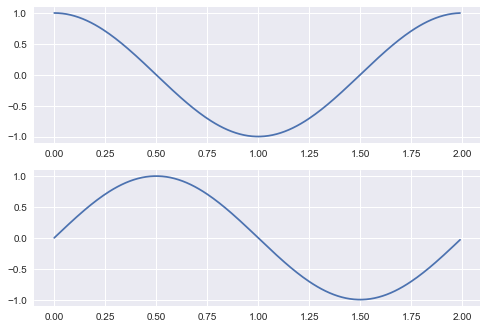

In [46]:
plt.figure()
plt.subplot(212)
plt.plot(t, s1)
plt.subplot(211)
plt.plot(t, s2)

plt.show()


Si se quieren listar todos los estilos, se puede hacer

In [47]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


En caso que se quiera usar para un solo gráfico 

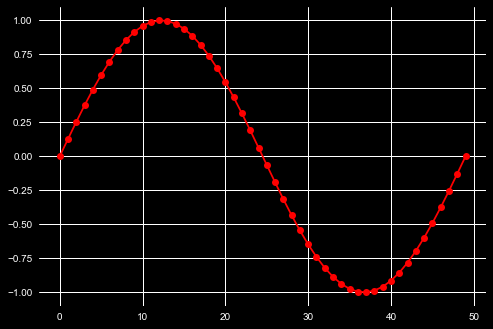

In [48]:
with plt.style.context(('dark_background')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()